## Estudo Mercado Imobiliário e Escolas
    Gabriel Alves
    Philipe Dias
    Tiago Milani

### Bibliotecas

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
import statsmodels.api as sms
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from scipy.stats import shapiro, anderson, jarque_bera



### Extração dos Dados

In [421]:
imoveis_t = pd.read_csv("imoveis_t.csv")
base = pd.read_csv("base_.csv")

### Tratamento

In [422]:
imoveis_t["D - Escola Próxima Privada"] = imoveis_t["Tipo_Escola_Mais_Proxima"].apply(lambda x: 1 if x== "Privada" else 0)
imoveis_t["Size2"] = imoveis_t["Size"]**2 
imoveis_t.drop(["Unnamed: 0", "Price", "Suites", "Parking", "Coordenadas", "Tipo_Escola_Mais_Proxima"], axis = 1, inplace=True)

imoveis_t = imoveis_t.reindex(columns = ['Price_per_sqm', 'Distancia_Escola_Mais_Proxima', 'D - Escola Próxima Privada', 'Size', 'Size2',  'Rooms', 'Toilets', 'Elevator', 'Swimming Pool', 'Furnished', 'New', 'District', 'Negotiation Type'])

In [423]:
tipo = "sale"

base = imoveis_t[imoveis_t["Negotiation Type"] == tipo]
dummies_bairro = pd.get_dummies(base["District"], prefix = "D - ")
base = base.drop(["Negotiation Type", "District"], axis = 1)
base["Rooms_School"] = (base["Rooms"]-1)*base["Distancia_Escola_Mais_Proxima"]
base["Rooms_PrivateSchool"] = (base["Rooms"]-1)*base["D - Escola Próxima Privada"]

y = base[["Price_per_sqm"]]
x = list(base.columns)[1:]
base = pd.concat([base[x], dummies_bairro], axis = 1)

x = sm.tools.add_constant(base)  # Add a constant (intercept) to the predictor
model = sms.OLS(y, x).fit()

# Print a summary of the regression results
print(model.summary())

# Alternatively, you can use summary_col to display multiple summaries side by side
summary = summary_col([model], stars=True)
print(summary)

residuos = pd.DataFrame({"Resíduos do Modelo": model.resid})

bp_test = sm.stats.api.het_breuschpagan(model.resid, model.model.exog)
lzip(
    ["Lagrange Multiplier Statistic", "P-Value", "F-Value", "F P-Value"],
    bp_test
)

if bp_test[1] < 0.05:
    print(r"Homoscedasticidade dos Resíduos com 95% de Confiança")
else:
    print(r"Não rejeitamos hipótese nula de que os resíduos são Heterocedásticos")

bp_test = pd.DataFrame(bp_test, index = ["Lagrange Multiplier Statistic", "P-Value", "F-Value", "F P-Value"])
bp_test.columns = [""]
bp_test = bp_test.applymap(lambda x: np.round(x, 4))

                            OLS Regression Results                            
Dep. Variable:          Price_per_sqm   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:50:34   Log-Likelihood:                -57280.
No. Observations:                6412   AIC:                         1.148e+05
Df Residuals:                    6304   BIC:                         1.155e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<AxesSubplot: >

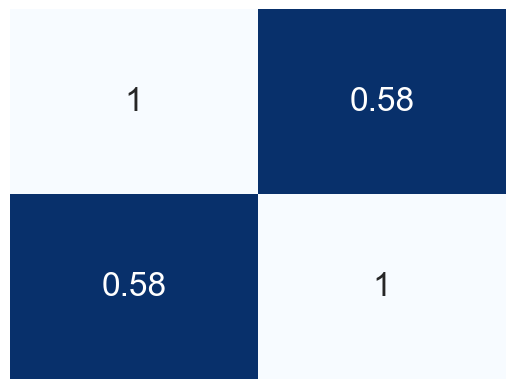

In [ ]:
bp_test
sns.heatmap(np.corrcoef(y.Price_per_sqm, residuos["Resíduos do Modelo"]), annot=True, cmap = "Blues_r", annot_kws={"fontsize": 24}, cbar =False, xticklabels=False, yticklabels=False)

Text(0.5, 1.0, 'Resíduos do Modelo')

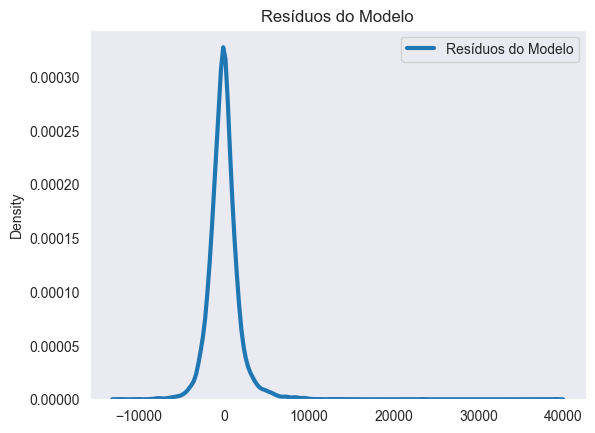

In [ ]:
sns.kdeplot(residuos, palette = "tab10", linewidth = 3)
plt.title("Resíduos do Modelo")

In [ ]:
base.sort_values(by= "Distancia_Escola_Mais_Proxima")

,Distancia_Escola_Mais_Proxima,D - Escola Próxima Privada,Size,Size2,Rooms,Toilets,Elevator,Swimming Pool,Furnished,New,...,D - _Vila Jacuí,D - _Vila Leopoldina,D - _Vila Madalena,D - _Vila Maria,D - _Vila Mariana,D - _Vila Matilde,D - _Vila Olimpia,D - _Vila Prudente,D - _Vila Sônia,D - _Água Rasa
3809,0.000011,1,55,3025,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5538,0.001070,1,44,1936,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0.001135,1,50,2500,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,0.001135,1,47,2209,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5520,0.004008,1,45,2025,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,3291.807662,1,100,10000,3,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3984,3291.821437,1,69,4761,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
357,3292.181787,1,48,2304,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1700,3292.392720,1,89,7921,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
representatividade_bairro = base.T.loc[[_ for _ in base.T.index if "D - _" in _]].mean(axis=1).sort_values(ascending=False)
representatividade_geral = base.T.loc[[_ for _ in base.T.index if "D - _" not in _]].mean(axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 [Text(0, 0, 'Casa Verde'),
  Text(1, 0, 'Bom Retiro'),
  Text(2, 0, 'Brooklin'),
  Text(3, 0, 'Bela Vista'),
  Text(4, 0, 'Moema'),
  Text(5, 0, 'Brás'),
  Text(6, 0, 'Barra Funda'),
  Text(7, 0, 'Jaçanã'),
  Text(8, 0, 'Santa Cecília'),
  Text(9, 0, 'Liberdade'),
  Text(10, 0, 'Mandaqui'),
  Text(11, 0, 'Belém'),
  Text(12, 0, 'Mooca'),
  Text(13, 0, 'República'),
  Text(14, 0, 'Consolação'),
  Text(15, 0, 'Perdizes'),
  Text(16, 0, 'Alto de Pinheiros'),
  Text(17, 0, 'Pinheiros'),
  Text(18, 0, 'Vila Prudente'),
  Text(19, 0, 'Vila Formosa'),
  Text(20, 0, 

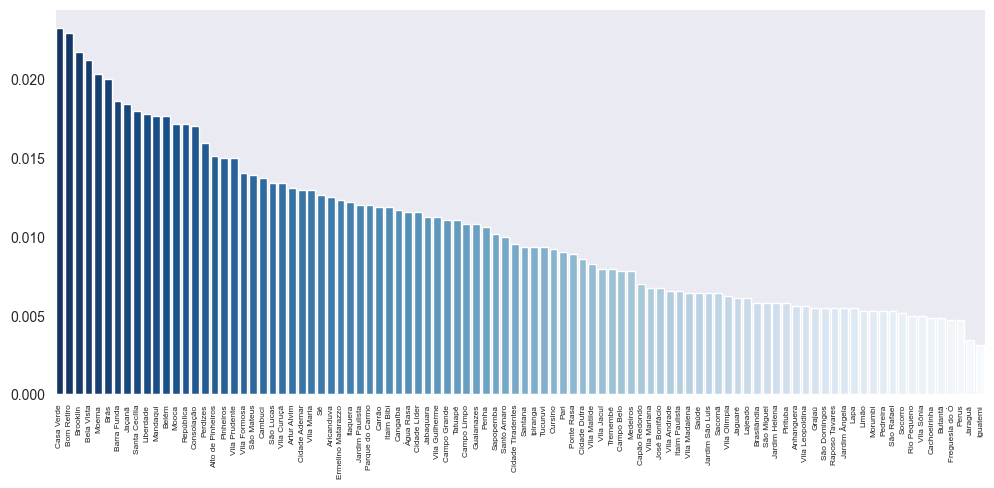

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(12,5))
sns.barplot(representatividade_bairro, x = [_.split("_")[1] for _ in representatividade_bairro.index],
             y = representatividade_bairro, palette = "Blues_r")
plt.xticks(rotation = 90, fontsize = 6)

In [ ]:
imoveis_t = pd.read_csv("imoveis_t.csv")
imoveis_t = imoveis_t[imoveis_t["Negotiation Type"] == tipo].dropna(axis = 1).drop(["Unnamed: 0", "District", "Coordenadas", "Negotiation Type", "Tipo_Escola_Mais_Proxima"], axis = 1)
imoveis_t.T.mean(axis=1)

Price                            608624.140050
Size                                 78.611042
Rooms                                 2.320805
Toilets                               2.037742
Suites                                0.931535
Parking                               1.326575
Elevator                              0.415471
Furnished                             0.117280
Swimming Pool                         0.539457
New                                   0.032283
Price_per_sqm                      6891.640879
Distancia_Escola_Mais_Proxima         7.904399
dtype: float64

[Text(0.5, 0, 'P'),
 Text(1.5, 0, 'S'),
 Text(2.5, 0, 'R'),
 Text(3.5, 0, 'T'),
 Text(4.5, 0, 'S'),
 Text(5.5, 0, 'P'),
 Text(6.5, 0, 'E'),
 Text(7.5, 0, 'F'),
 Text(8.5, 0, 'S'),
 Text(9.5, 0, 'N'),
 Text(10.5, 0, 'P'),
 Text(11.5, 0, 'D')]

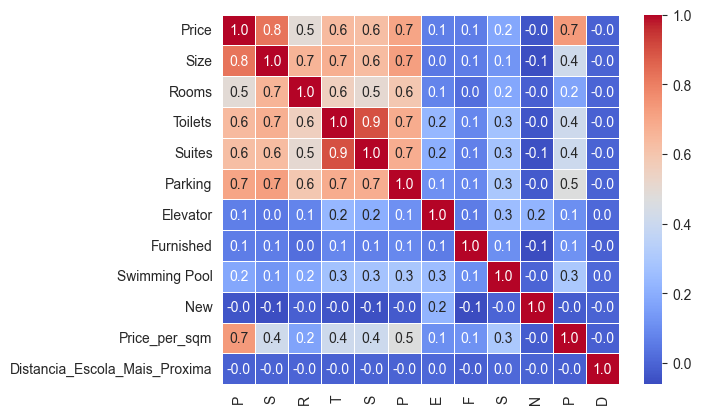

In [ ]:
ax = sns.heatmap(imoveis_t.corr(),annot=True, cmap='coolwarm', linewidths=0.5, fmt = ".1f")
ax.set_xticklabels([label[0] for label in imoveis_t.columns])

In [ ]:
statistic, p_value = shapiro(residuos.values)
result = anderson(residuos.values)

print("==== Shapiro-Wilk Test =====")
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

print("==== Anderson-Darling Test =====")
print("Anderson-Darling Test:")
print("Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

# Interpret the results
print("Normality:", result.statistic < result.critical_values[2])


statistic, p_value = jarque_bera(residuos)

print("Jarque-Bera Test:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject H0)")
else:
    print("Data does not look Gaussian (reject H0)")

C:\Users\Titom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


==== Shapiro-Wilk Test =====
Shapiro-Wilk Test:
Statistic: 0.8695566654205322
P-value: 0.0
Sample does not look Gaussian (reject H0)
==== Anderson-Darling Test =====
Anderson-Darling Test:
Statistic: [-6410.02366736 -6406.07100208 -6402.1183368  ... 18922.60812357
 18926.56078885 18930.51345413]
Critical Values: [0.576 0.656 0.787 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
Normality: [ True  True  True ... False False False]
Jarque-Bera Test:
Statistic: 439568.65208472376
P-value: 0.0
Data does not look Gaussian (reject H0)


<AxesSubplot: >

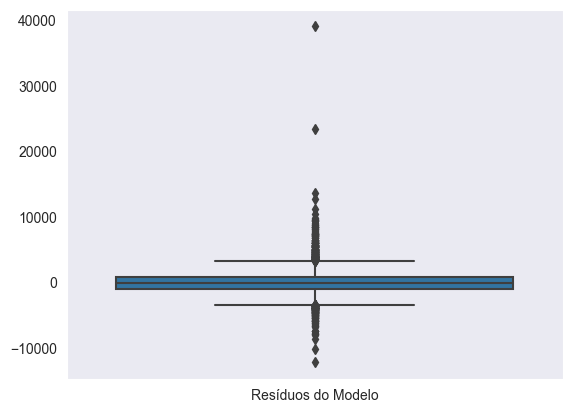

In [ ]:
sns.boxplot(residuos)

### Robustez efeito bairro

In [ ]:
imoveis_t = pd.read_csv("imoveis_t.csv")

imoveis_t["D - Escola Próxima Privada"] = imoveis_t["Tipo_Escola_Mais_Proxima"].apply(lambda x: 1 if x== "Privada" else 0)
imoveis_t["Size2"] = imoveis_t["Size"]**2 
imoveis_t.drop(["Unnamed: 0", "Price", "Suites", "Parking", "Coordenadas", "Tipo_Escola_Mais_Proxima"], axis = 1, inplace=True)

imoveis_t = imoveis_t.reindex(columns = ['Price_per_sqm', 'Distancia_Escola_Mais_Proxima', 'D - Escola Próxima Privada', 'Size', 'Size2',  'Rooms', 'Toilets', 'Elevator', 'Swimming Pool', 'Furnished', 'New', 'District', 'Negotiation Type'])
imoveis_t = imoveis_t[imoveis_t["Negotiation Type"] == tipo]

distritos_pm2 = imoveis_t.groupby("District").mean().reset_index()

C:\Users\Titom\AppData\Local\Temp\ipykernel_24000\2608273232.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  distritos_pm2 = imoveis_t.groupby("District").mean().reset_index()


In [ ]:
imoveis_b = imoveis_t.merge(distritos_pm2[["District", "Price_per_sqm"]], on = "District", how = "right")

In [ ]:
base = imoveis_b[imoveis_b["Negotiation Type"] == tipo]
base = base.drop(["Negotiation Type", "District"], axis = 1)

y = base[["Price_per_sqm_x"]]
x = list(base.columns)[1:]
base = base[x]

# x = sm.tools.add_constant(base)  # Add a constant (intercept) to the predictor
x = base
model = sms.OLS(y, x).fit()

# Print a summary of the regression results
print(model.summary())

# Alternatively, you can use summary_col to display multiple summaries side by side
summary = summary_col([model], stars=True)
print(summary)

                                 OLS Regression Results                                
Dep. Variable:        Price_per_sqm_x   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              9178.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):                        0.00
Time:                        22:50:30   Log-Likelihood:                         -57348.
No. Observations:                6412   AIC:                                  1.147e+05
Df Residuals:                    6401   BIC:                                  1.148e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [ ]:
base = imoveis_b[imoveis_b["Negotiation Type"] == tipo]
dummies_bairro = pd.get_dummies(base["District"], prefix = "D - ")
base = base.drop(["Negotiation Type", "District"], axis = 1)

y = base["Price_per_sqm_x"] - base["Price_per_sqm_y"]
x = list(base.columns)[1:-1]
base = pd.concat([base[x], dummies_bairro], axis = 1)

# x = sm.tools.add_constant(base)  # Add a constant (intercept) to the predictor
x = base
model = sms.OLS(y, x).fit()

# Print a summary of the regression results
print(model.summary())

# Alternatively, you can use summary_col to display multiple summaries side by side
summary = summary_col([model], stars=True)
print(summary)

residuos_r = model.resid

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     10.53
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          4.34e-151
Time:                        22:50:31   Log-Likelihood:                -57281.
No. Observations:                6412   AIC:                         1.148e+05
Df Residuals:                    6306   BIC:                         1.155e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Distancia_Esco

In [ ]:
statistic, p_value = jarque_bera(residuos_r)

print("Jarque-Bera Test:")
print("Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Data looks Gaussian (fail to reject H0)")
else:
    print("Data does not look Gaussian (reject H0)")

Jarque-Bera Test:
Statistic: 438956.7824617233
P-value: 0.0
Data does not look Gaussian (reject H0)


<AxesSubplot: >

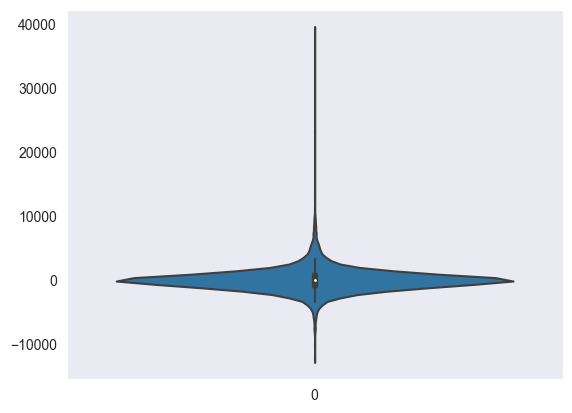

In [ ]:
sns.violinplot(residuos_r)